In [1]:
# add location to path and complete necessary class imports
import sys
sys.path.append('..')

from shipClass.Component import Component
from shipClass.SensedComp import SensedComp
from shipClass.System import System
from shipClass.SeriesSensedComps import SeriesSensedComps

DRAW A SIMPLE PARALLEL SYSTEM

draw parallels goes here
draw parallels goes here
draw parallels goes here


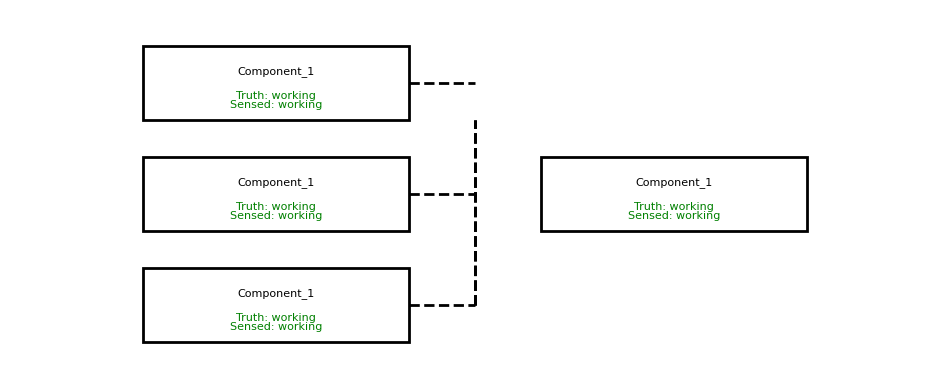

In [2]:
parallel_sys_comps = [SensedComp() for i in range(4)]
parallel_sys = System(name= "Parallel System", comps= parallel_sys_comps, parallels = [(1,2,3)])

parallel_sys.drawSystem()

CREATE AND DRAW A SERIES SYSTEM

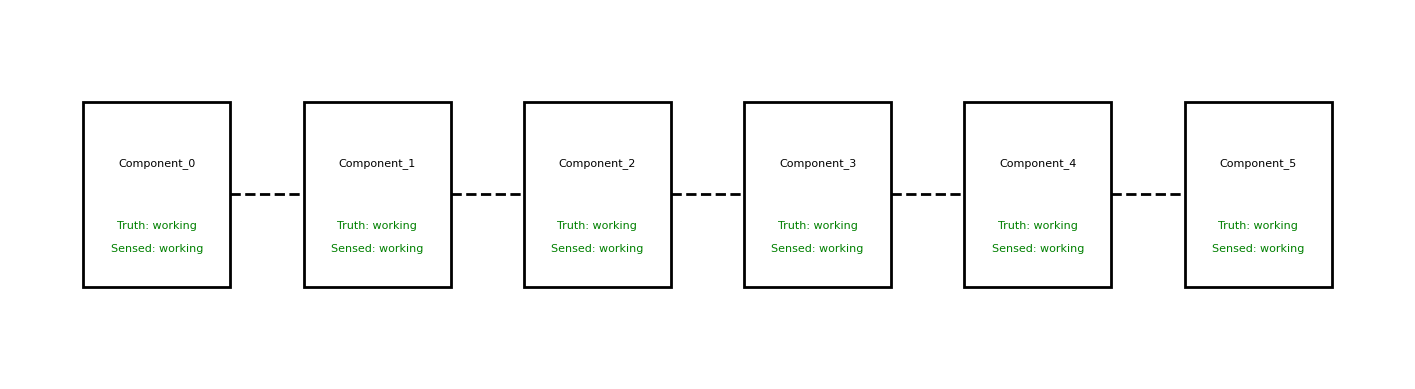

: 

: 

: 

: 

: 

In [ ]:
system_comps = [SensedComp(Component(name=f"Component_{i}")) for i in range(6)]
series_sys = System(name="SeriesSystem", comps=system_comps, unmanned=True)

series_sys.drawSystem()


CREATE AND DRAW A SERIES PARALLEL SYSTEM

IndexError: list index out of range

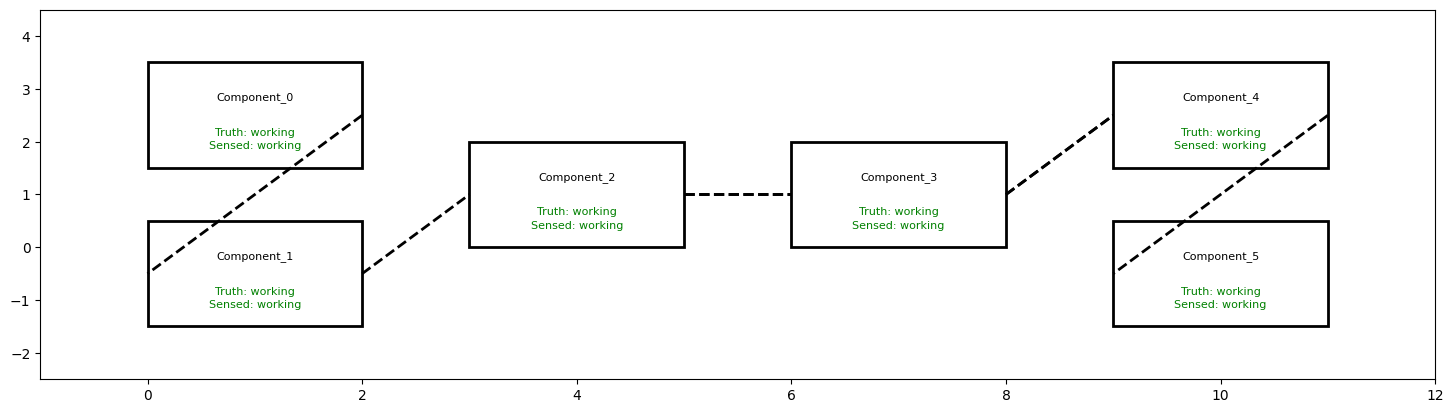

: 

: 

: 

: 

: 

In [ ]:
sys_comps = [SensedComp(Component(name=f"Component_{i}")) for i in range(6)]
sys = System(name="SeriesSystem", comps=sys_comps, parallels = [(1,2), (5,6)], unmanned=True)
sys.drawSystem()

INITIALIZE A SYSTEM WITH SERIES SETS IN PARALLEL


Component       State      Sensed State
SeriesSensedComps 1          1         
SeriesSensedComps 2 1          1         
MainSystem      1          1         


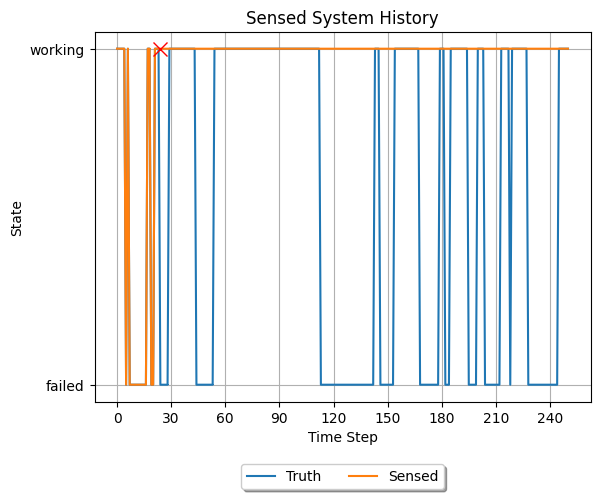

: 

: 

: 

: 

: 

In [ ]:
# initialize six sensed components
sensed_components = [SensedComp(Component(name=f"Component_{i}", MTTR=10)) for i in range(6)]

# make two sets of series sensed components
series_sensed_components_1 = SeriesSensedComps(components=sensed_components[:3])
series_sensed_components_2 = SeriesSensedComps(components=sensed_components[3:])

# add the series sensed components to the main system
main_system = System(name="MainSystem", comps=[series_sensed_components_1, series_sensed_components_2], parallels=None, unmanned=False)
main_system.simulate(250)

main_system.plotHistory()
main_system.printHistory2Excel()

DRAW INITIALIZED SYSTEM

AttributeError: 'SeriesSensedComps' object has no attribute 'comp'

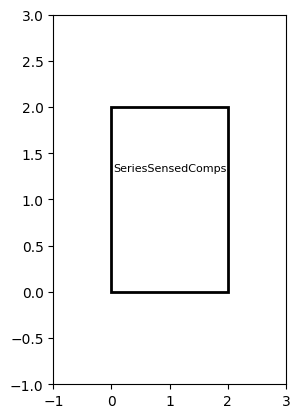

: 

: 

: 

: 

: 

In [ ]:
# main_system.drawSystem()

In [ ]:
# a function to conduct periodic maintenance on a system
def conductPM(system):

    PM_Period = 10 # the period of time for periodic maintenance

    # loop through each component in the system, and determine ones need repair
    for comp in system.comps:

        #if failed , the component will be in state -1 while being repaired
        if comp.comp.state == 0:
            repair_period = [-1 for i in range(PM_Period)]
            comp.comp.history += repair_period
            comp.sensedHistory+= repair_period

            # once the repair period is over, the component is reset to a good as new state 
            comp.comp.markovChain.reset()
            for sensor in comp.sensors:
                sensor.markovChain.reset()

        # leave any components that don't need a repair in thier current state until PM is done
        else:
            idle_period = [comp.comp.state for i in range(PM_Period+1)] #add one to keep all histories equal length
            comp.comp.history+= idle_period
            comp.sensedHistory+= idle_period

            for sensor in comp.sensors:
                idle_period = [sensor.state for i in range(PM_Period+1)] #add one to keep all histories equal length
                sensor.history += idle_period
            
    return PM_Period

: 

: 

: 

: 

: 

Debugging Complex Parallel Series Structure

In [ ]:
# initialize thee test systems with 7, 8, and 9 sensed components
sys4_comps = [SensedComp("sensed_comp_"+str(i+1)) for i in range(7)]
sys4 = System("Test System 4", sys4_comps, 
              parallels=[(1,2,5),(3,4),(6,7)]) # debug parallel logic here

sys5_comps = [SensedComp() for _ in range(8)]
while sys4.state != 0:
    sys4.simulate(1)

conductPM(sys4)

while sys4.state != 0:
    sys4.simulate(1)
    
sys4.plotHistory()
# sys4.printHistory2Excel("testResults/complexSystem.xlsx")

AttributeError: 'str' object has no attribute 'name'

: 

: 

: 

: 

: 

System Test #1: Series System

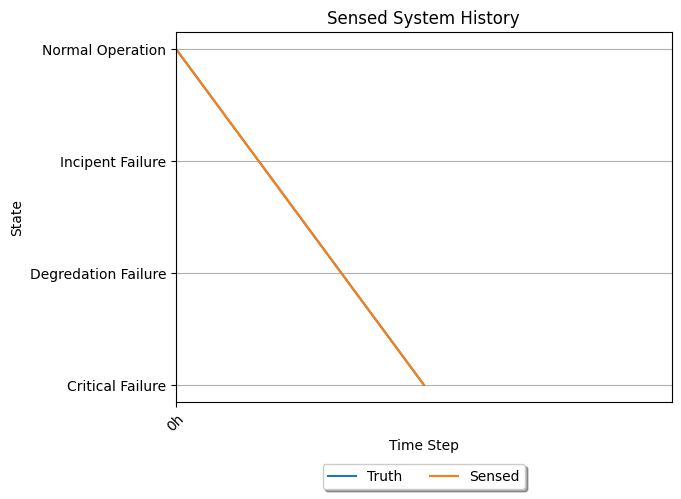

: 

: 

: 

: 

: 

In [ ]:
# create one high reliability component and two low-reliability ones
states = { 0: 'Critical Failure',
           1: 'Degredation Failure',
           2: 'Incipent Failure', 
           3: 'Normal Operation'}

high_rel_mat = [[1, 0, 0, 0], 
                [0.4, 0.6, 0, 0],
                [0.2, 0.2, 0.6, 0],
                [0.025, 0.025, 0.05, 0.9]]

low_rel_mat = [[1, 0, 0, 0], 
                [0.6, 0.4, 0, 0],
                [0.2, 0.5, 0.3, 0],
                [0.1, 0.1, 0.2, 0.6]]

# assuming all components will have a default sensor with the same states and matrix (good sensing capability)
sensor_states = {0: 'Faulty',
                 1: 'Normal Operation'}
sensor_mat = [[1, 0],
              [0.5, 0.5]]

# initialize three sensed components, one sensor attached to each component
# the sensor is the same for all three components, but they can be different if desired
sc1 = SensedComp('High_Rel_Comp1', states, high_rel_mat, sensor_states, sensor_mat, 3)
sc2 = SensedComp('High_Rel_Comp2', states, high_rel_mat, sensor_states, sensor_mat, 3)
sc3 = SensedComp('Low_Rel_Comp1', states, low_rel_mat, sensor_states, sensor_mat, 3)
sc4 = SensedComp('Low_Rel_Comp2', states, low_rel_mat, sensor_states, sensor_mat, 3)

# create a system from the sensed components
sensed_components = [sc1, sc2, sc3, sc4]
sys1 = System('Test Series System', sensed_components)

# simulate the system until it fails
while sys1.state != 0:
    sys1.simulate(1)

# plot the system history
sys1.plotHistory()

# print the system history to excel
sys1.printHistory2Excel('testResults/series_sys_test.xlsx')

System Test #2: Parallel System Test

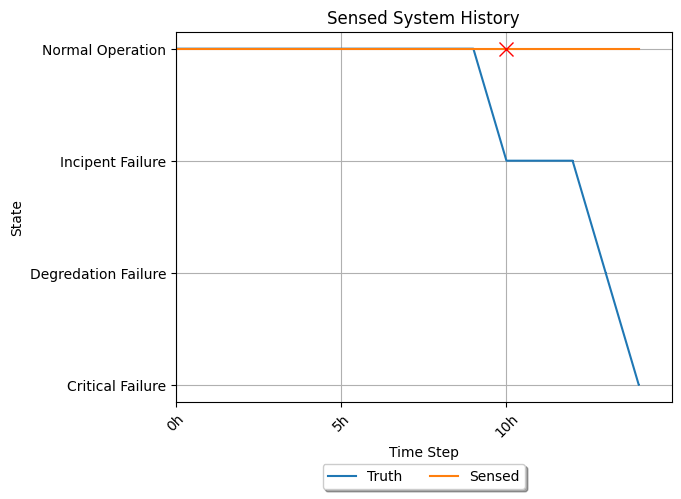

: 

: 

: 

: 

: 

In [ ]:
# defining four components for testing
comp_states = { 0: 'Critical Failure',
           1: 'Degredation Failure',
           2: 'Incipent Failure', 
           3: 'Normal Operation'}


comp_transition_mat = [[1, 0, 0, 0], 
                       [0.4, 0.6, 0, 0],
                       [0.1, 0.2, 0.7, 0],
                       [0.025, 0.025, 0.05, 0.9]]

sensor_states = {0: 'Faulty',
                 1: 'Normal Operation'}
sensor_mat = [[1, 0],
              [0.25, 0.75]]

# initialize four components with the same transition matrix and states
comp1 = SensedComp('Component_1', comp_states, comp_transition_mat, sensor_states, sensor_mat, 3)
comp2 = SensedComp('Component_2', comp_states, comp_transition_mat, sensor_states, sensor_mat, 3)
comp3 = SensedComp('Component_3', comp_states, comp_transition_mat, sensor_states, sensor_mat, 3)
comp4 = SensedComp('Component_4', comp_states, comp_transition_mat, sensor_states, sensor_mat, 3)

# create a series system from the components with two parallel branches
sys2 = System('Test Parallel System', [comp1, comp2, comp3, comp4], parallels=[(1,2),(3,4)])

# simulate the system until system failure
while sys2.state != 0:
    sys2.simulate(1)

sys2.plotHistory()
sys2.printHistory2Excel('testResults/parallel_sys_test.xlsx')

System Test #3: Series - Parallel System Test

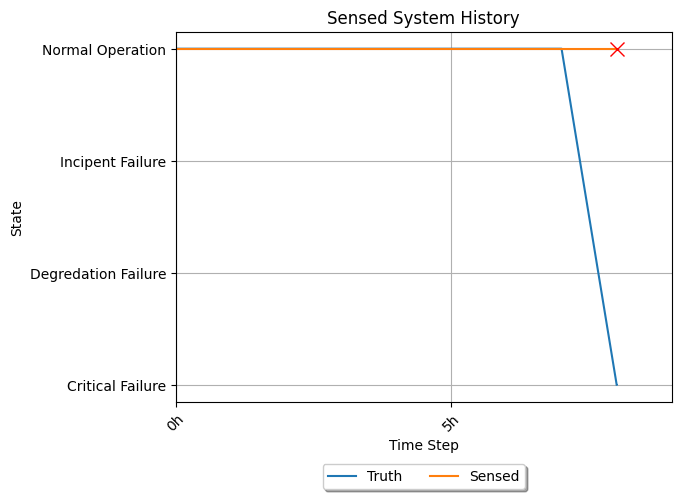

: 

: 

: 

: 

: 

In [ ]:
# defining four components for testing
comp_states = { 0: 'Critical Failure',
           1: 'Degredation Failure',
           2: 'Incipent Failure', 
           3: 'Normal Operation'}


comp_transition_mat = [[1, 0, 0, 0], 
                       [0.4, 0.6, 0, 0],
                       [0.1, 0.2, 0.7, 0],
                       [0.025, 0.025, 0.05, 0.9]]

sensor_states = {0: 'Faulty',
                 1: 'Normal Operation'}
sensor_mat = [[1, 0],
              [0.25, 0.75]]

# initialize four components with the same transition matrix and states
num_comps = 6
comps = [SensedComp('comp_'+str(i+1), comp_states, comp_transition_mat, sensor_states, sensor_mat, 3) for i in range(num_comps)]

# create a series system from the components with two parallel branches
sys2 = System('Test Parallel-Series System', comps, parallels=[(1,2),(4,5)])

# simulate the system until system failure
while sys2.state != 0:
    sys2.simulate(1)

sys2.plotHistory()
sys2.printHistory2Excel('testResults/parallel_series_sys_test.xlsx')

Extra Functions, Ideas, and Examples